In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ti_seq = np.array([*list(range(50, 400, 25)),
                       *list(range(400, 1000, 10)),
                       1000, 1030, 1050, 1080, 1100, 1130, 1150, 1180, 1200, 1230, 1250, 1280, 1300, 1330, 1350, 1380,
                       1400, 1450, 1500, 1550, 1600, 1650, 1700,
                       1800, 1900, 2000, 2100, 2200, 2300, 2500, 3000], dtype=float)

In [3]:
fn = "1111111111_15s_ep2d_se_til_shlomi_50-3000_2m2ISO_cor_PAT2_TE22_TR30k.nii.gz.txt"
file = open(fn, "r")
lines = file.readlines()[2:]
sig = [float(x.split('\t')[1]) for x in lines]

In [ ]:
for i in range(11):
    plt.plot(ti_seq, sig[105*i:105*(i+1)])
    plt.title("ROI {}".format(i))
    plt.ylim(0, 3100)
    # plt.savefig("fig{}".format(i))
    plt.show()

In [4]:
%pip install pandas
import pandas as pd

     |████████████████████████████████| 11.3 MB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
roi = pd.read_csv(fn,sep='\t',header=1).dropna(axis=1)

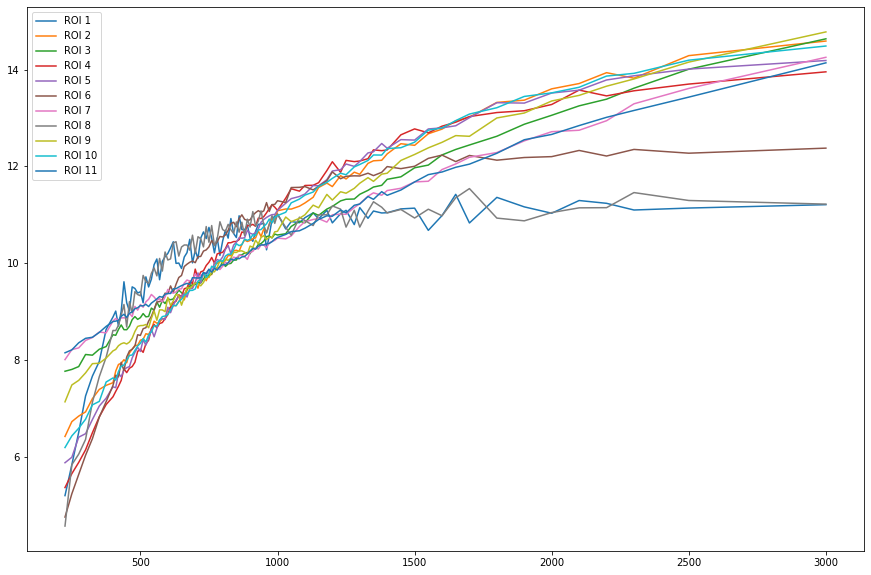

In [6]:
low = 7
plt.figure(figsize=(15,10))
for r in roi['ROI'].unique():
    roir = roi.where(roi['ROI'] == r).dropna()['Mean'].values[low:]
    roir *= 1000. / np.sum(roir)
    plt.plot(ti_seq[low:],roir,label=r)
plt.legend()
plt.show()

In [8]:
%pip install scipy

     |████████████████████████████████| 38.1 MB 5.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


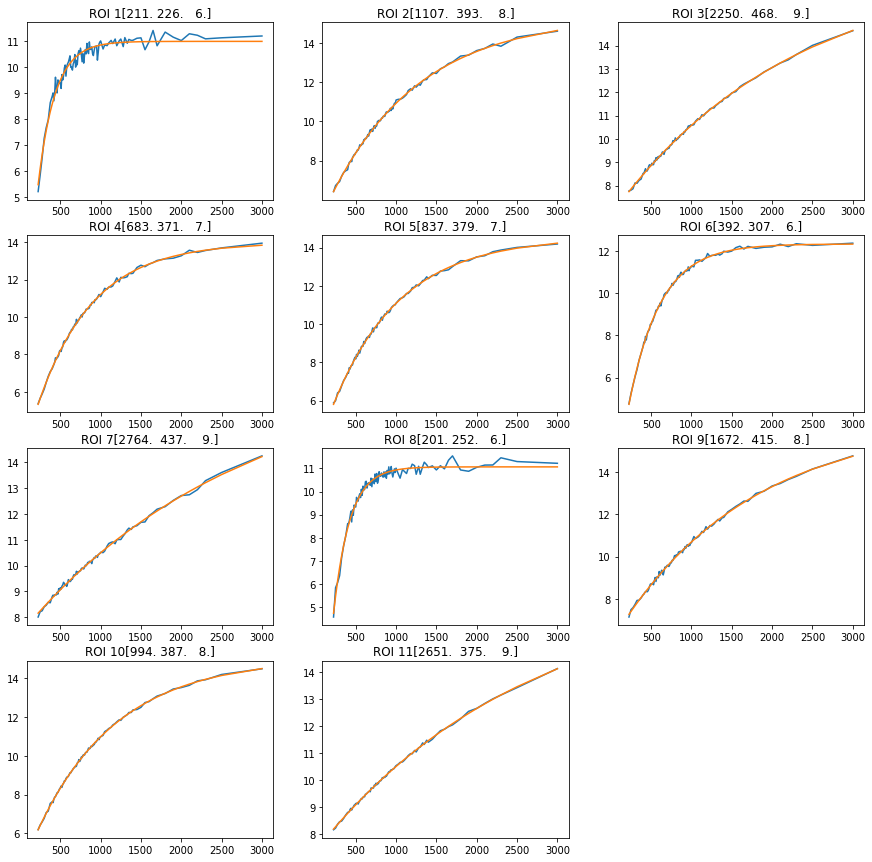

In [38]:
from scipy.optimize import curve_fit

def f(x,TI,T0,M0):
    return M0 * (2. - np.exp(-(x - T0) / TI))

plt.figure(figsize=(15,15))
for i,r in enumerate(roi['ROI'].unique()):
    roir = roi.where(roi['ROI'] == r).dropna()['Mean'].values[low:]
    roir *= 1000. / np.sum(roir)

    x = ti_seq[low:]


    par,_ = curve_fit(f,x,roir,p0=(500.,0.,5.))

    plt.subplot(4,3,i+1)
    plt.plot(x,roir)
    plt.plot(x,f(x,*par))
    plt.title(r + np.array_str(par,precision=0))
    
plt.show()